<a href="https://colab.research.google.com/github/PradeepKumarM30/MachineLearningtechniques/blob/main/20MAI0030ASSESSMENT2/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering Guided Demo**
# **Overview**
# **1. Partition based - Kmeans**
# **2. Hierarchial - Agglomerative**

# **EX1. Kmeans for Salary Dataset**

# **1. Import dataset**

In [99]:
#Kmeans -- K = Number of clusters
import pandas as pd

customers_df = pd.read_csv("/content/sample_data/Salary_Data.csv")
customers_df.head(10)


,age,income
0,25,69343
1,31,69891
2,26,56642
3,51,65000
4,35,44555
5,37,47900
6,39,38900
7,56,82000
8,30,57731
9,29,63525


# **2. Import library**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


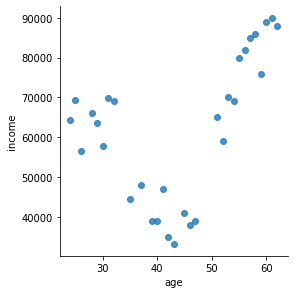

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#SCATTER PLOT

sns.lmplot("age","income",data = customers_df, fit_reg = False,size=4)

# **3 . Import Kmeans and run**

In [101]:
from sklearn.cluster import KMeans
clusters = KMeans(3)
clusters.fit(customers_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# **4.The result var is clusters.label_**

In [102]:
customers_df["clusterid"] = clusters.labels_

In [103]:
customers_df[0:10]

,age,income,clusterid
0,25,69343,1
1,31,69891,1
2,26,56642,1
3,51,65000,1
4,35,44555,0
5,37,47900,0
6,39,38900,0
7,56,82000,2
8,30,57731,1
9,29,63525,1


# **5 . Plot clusters**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


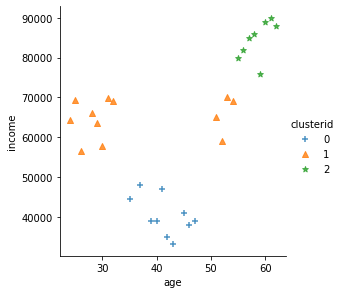

In [104]:
markers = ['+','^','*']
sns.lmplot("age","income",data = customers_df, hue = "clusterid", fit_reg = False, size = 4, markers = markers )

# **6. Normalize the features**

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_customer_df = scaler.fit_transform(customers_df[["age","income"]])

scaled_customer_df[0:10]

array([[-1.58294052,  0.41411441],
       [-1.08130444,  0.44493328],
       [-1.49933451, -0.3001746 ],
       [ 0.59081583,  0.1698693 ],
       [-0.74688039, -0.97993299],
       [-0.57966836, -0.7918142 ],
       [-0.41245633, -1.29796341],
       [ 1.0088459 ,  1.12592892],
       [-1.16491046, -0.23893055],
       [-1.24851647,  0.08691707]])

# **7. Clustering on the normalized data**

In [106]:
clusters_new = KMeans(3)
clusters_new.fit(scaled_customer_df)
customers_df["clusterid_scaled"] = clusters_new.labels_

# **8. Plot again**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


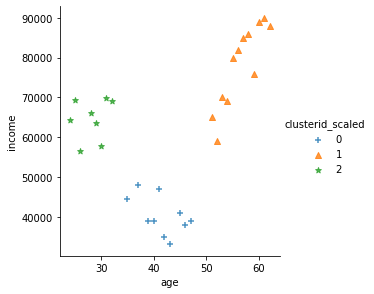

In [107]:
markers = ['+','^','*']
sns.lmplot("age","income",data = customers_df, hue = "clusterid_scaled", fit_reg = False, size = 4, markers = markers )

# **Clustering using Agglomerative with salary data**

In [108]:
clusters_agglo = AgglomerativeClustering(3)
clusters_agglo.fit(scaled_customer_df)
customers_df["clusterid_agglo"] = clusters.labels_


In [109]:
customers_df[1:5]

,age,income,clusterid,clusterid_scaled,clusterid_agglo
1,31,69891,1,2,1
2,26,56642,1,2,1
3,51,65000,1,1,1
4,35,44555,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


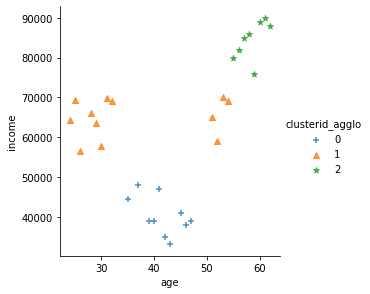

In [110]:
markers = ['+','^','*']
sns.lmplot("age","income",data = customers_df, hue = "clusterid_agglo", fit_reg = False, size = 4, markers = markers )

# **Remark for Kmeans vs Agglomerative for Salary dataset post normalization**
# **1. Clustering is more based on the age axis for kmeans but in agglomertaive it takes the income also more largely in consideration**


# **Clustering using Kmeans with beverage dataset**

In [111]:
bev_df = pd.DataFrame(pd.read_excel("/content/sample_data/bev.xlsx"))
bev_df.head(10)

,Name,Potassium,Sodium,Caffeine,Cost
0,new_england_coffee,144,15,4.7,0.43
1,post_alley_blend,151,19,4.9,0.43
2,stumpdown_coffee,157,15,0.9,0.48
3,bizzy_organic_coffee,170,7,5.2,0.73
4,indian_bean,152,11,5.0,0.77
5,jacobs_coffee,145,23,4.6,0.28
6,grounds_hounds_coffee,175,24,5.5,0.40
7,la_columbe_corisca,149,27,4.7,0.42
8,lavazza_super_crema,99,10,4.3,0.43
9,mount_hagen,113,8,3.7,0.40


In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_bev_df = scaler.fit_transform(bev_df[["Potassium","Sodium","Caffeine","Cost"]])

scaled_bev_df[0:10]

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861]])

In [113]:
clusters_new = KMeans(3)
clusters_new.fit(scaled_bev_df)
bev_df["clusterid_scaled"] = clusters_new.labels_

In [114]:
bev_df[bev_df.clusterid_scaled == 1]

,Name,Potassium,Sodium,Caffeine,Cost,clusterid_scaled
2,stumpdown_coffee,157,15,0.9,0.48,1
8,lavazza_super_crema,99,10,4.3,0.43,1
9,mount_hagen,113,8,3.7,0.40,1
11,peerless_wholebean,102,15,4.1,0.46,1
12,stone_street_coffee,135,11,4.2,0.50,1
15,caribou_coffee,68,15,2.3,0.38,1
18,davidoff_coffee,72,6,2.9,0.46,1
19,js_coffee,97,7,4.2,0.47,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


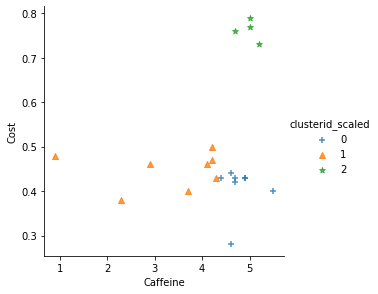

In [115]:
markers = ['+','^','*']
sns.lmplot("Caffeine","Cost",data = bev_df, hue = "clusterid_scaled", fit_reg = False, size = 4, markers = markers )

# **Clustering Beverage dataset with agglomerative clustering**

In [116]:
from sklearn.cluster import AgglomerativeClustering
clusters_agglo = AgglomerativeClustering(3)
clusters_agglo.fit(scaled_bev_df)
bev_df["clusterid_agglo"] = clusters_agglo.labels_


In [117]:
bev_df

,Name,Potassium,Sodium,Caffeine,Cost,clusterid_scaled,clusterid_agglo
0,new_england_coffee,144,15,4.7,0.43,0,1
1,post_alley_blend,151,19,4.9,0.43,0,1
2,stumpdown_coffee,157,15,0.9,0.48,1,0
3,bizzy_organic_coffee,170,7,5.2,0.73,2,2
4,indian_bean,152,11,5.0,0.77,2,2
5,jacobs_coffee,145,23,4.6,0.28,0,1
6,grounds_hounds_coffee,175,24,5.5,0.40,0,1
7,la_columbe_corisca,149,27,4.7,0.42,0,1
8,lavazza_super_crema,99,10,4.3,0.43,1,0
9,mount_hagen,113,8,3.7,0.40,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


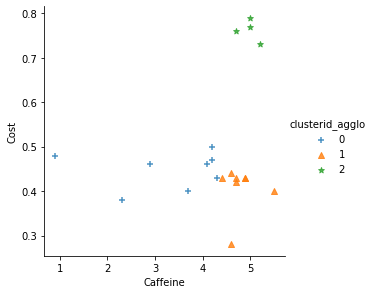

In [118]:
markers = ['+','^','*']
sns.lmplot("Caffeine","Cost",data = bev_df, hue = "clusterid_agglo", fit_reg = False, size = 4, markers = markers )

# **One common observation is that based on the features that we take into consideration thecluster varies accordingly and the new data frame with the new labels for both the clustering techniques is given above**
# **1. Clustering is more based on the X axis for kmeans but in agglomertaive it takes the Y axis also more largely in consideration**